# Graded Assignment 1 - Energy Consumption Analysis Across Household Types


# Introduction to This Template Notebook

* This is a **personal** notebook.
* Make a **copy** of `...-template.ipynb` and
**rename** it to `...-yourIDnr.ipynb`,
where `yourIDnr` is your TU/e identification number.

<div class="alert alert-danger" role="danger">
<h3>Integrity</h3>
<ul>
    <li>In this course you must act according to the rules of the TU/e code of scientific conduct.</li>
    <li>All the exercises and the graded assignments are to be executed individually and independently.</li>
    <li>You must not copy from the Internet, your friends, books... If you represent other people's work as your own, then that constitutes fraud and will be reported to the Examination Committee.</li>
    <li>Making your work available to others (complicity) also constitutes fraud.</li>
</ul>
</div>

You are expected to work with Python code in this notebook.

The locations where you should write your solutions can be recognized by
**marker lines**,
which look like this:

>`#//`
>    `BEGIN_TODO [Label]` `Description` `(n points)`
>
>`#//`
>    `END_TODO [Label]`

<div class="alert alert-warning" role="alert">Do NOT modify or delete these marker lines.  Keep them as they are.<br/>
NEVER write code <i>outside</i> the marked blocks.
Such code cannot be evaluated.
</div>

Proceed in this notebook as follows:
* **Read** the text.
* **Fill in** your solutions in the cells that are between the cells with `BEGIN_TODO` and `END_TODO` marker lines.
* **Run** _all_ code cells (also the ones _without_ your code),
    _in linear order_ from the first code cell.

# Personalize your notebook:
1. Copy the following three lines of code:

  ```python
AUTHOR_NAME = 'Your Full Name'
AUTHOR_ID_NR = '1234567'
AUTHOR_DATE = 'YYYY-MM-DD'
  ```
1. Paste them between the marker lines in the next code cell.
1. Fill in your _full name_, _identification number_, and the current _date_ (i.e. when you first modified this notebook, e.g. '2024-11-15') as strings between the `Author` markers.
1. Run the code cell by putting the cursor there and typing **Control-Enter**.


In [93]:
from matplotlib.pyplot import xlabel

#// BEGIN_TODO [Author] (author, 0 points)

AUTHOR_NAME = 'Ivan Sergeevich Mishin'
AUTHOR_ID_NR = '2076209'
AUTHOR_DATE = '2024-11-27'


In [94]:
#// END_TODO [Author]

## <a id='toc0_'></a>[Table of Contents](#toc0_)

- Graded Assignment 1 - Energy Consumption Analysis Across Household Types   
  - [Table of Contents](#toc0_)
  - [Organizational Matters](#toc1_1_)    
  - [Introduction](#toc1_2_)    
    - [Origin of the Data](#toc1_2_1_)    
    - [Problem Statement](#toc1_2_2_)    
    - [Development of a Hypothesis](#toc1_2_3_)    
    - [Personalization of the Assignment](#toc1_2_4_)    
  - [Dataset](#toc1_3_)    
    - [The `df_energy` DataFrame](#toc1_3_1_)    
    - [The `df_population` DataFrame](#toc1_3_2_)    
    - [The `df_edu` DataFrame](#toc1_3_3_)    
    - [The `df_weather` DataFrame](#toc1_3_4_)    
  - [Preparation](#toc1_4_)    
    - [Load the Libraries](#toc1_4_1_)    
    - [Load the Data](#toc1_4_2_)    
  - [Part 1](#toc1_5_)    
    - [Task 1a: Municipality characteristics](#toc1_5_1_)    
    - [Task 1b: Natural gas consumption](#toc1_5_2_)    
    - [Task 1c: Trends in natural gas consumption](#toc1_5_3_)    
    - [Task 1d: Temperature distribution](#toc1_5_4_)    
    - [Degree days](#toc1_5_5_)    
    - [Task 2a: Computing the degree days](#toc1_5_6_)    
    - [Task 2b: Compare degree days to energy consumption](#toc1_5_7_)    
  - [Part 2](#toc1_6_)    
      - [Task 3a: Choose variables for the prediction model](#toc1_6_1_1_)    
      - [Task 3b: Split data into training and test data](#toc1_6_1_2_)    
      - [Task 3c: Create your prediction model](#toc1_6_1_3_)    
  - [Part 3](#toc1_7_)    
    - [Task 4: Concluding Hypothesis](#toc1_7_1_)    
    - [Task 5: Create Your Poster](#toc1_7_2_)    
  - [Footnotes](#toc1_8_)    
  - [References](#toc1_9_)    
- [Feedback](#toc2_)    
    - [How many hours did you spend on these Exercises?](#toc2_1_1_)    
    - [How difficult did you find these Exercises?](#toc2_1_2_)    
    - [(Optional) What did you like?](#toc2_1_3_)    
    - [(Optional) What can be improved?](#toc2_1_4_)    
  - [How to Submit Your Work](#toc2_2_)    
- [(End of Notebook) <span class="tocSkip"></span>](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

<div class="alert-danger alert" role="alert">
    <b>Important:</b> The use of external libraries, packages, or modules that have not been explicitly imported in the <a href=#Preparation>Preparation</a> part of this assignment is <b>forbidden</b>, except in the final poster task (cf. <a href=#Step-5.-Create-Your-Poster>Step 5. Create Your Poster</a>).
</div>

---
## <a id='toc1_1_'></a>[Organizational Matters](#toc0_)

Welcome to the first graded assignment of the course Foundations of Data Analytics (2IAB1)! This assignment consists of three parts:

- **Part 1.** *Data exploration*: You are to get familiar with the dataset and come up with ideas to investigate in Part 2.

- **Part 2.** *Data mining*: Here you will investigate the relationship between the variables of interest using data mining techniques.

- **Part 3.** *Presenting insights*: You are to use the insights that you have obtained from *Part 1* and *Part 2* to create a **poster** on which you report and discuss your findings.

The deadline for the graded assignment, including both this notebook and your poster, is **Friday December 6, 2024, at 21:00**.

Your assignment will be graded on two components: 
1. the work in this notebook, graded by Momotor, and
2. your poster.

For the precise assessment criteria, see the [study guide on Canvas](https://canvas.tue.nl/courses/28674/pages/study-guide-2iab1-foundations-of-data-analytics).

<div class="alert alert-block alert-danger">
<b>Three very important remarks:</b> <br>
    
1. Ensure that the **visualizations that you include in your poster** are also produced by your notebook and that they follow best practices. The Visualization section of the [poster guidelines](https://canvas.tue.nl/courses/28674/files/5628655/download?wrap=1) provides the minimal requirements for the visualizations. **Double-check** if the visualizations are produced correctly on Momotor under the **Running submitted notebook** tab.
2. Submit your notebook regularly before the deadline and make sure **Momotor does not give any errors in any tab**. If it does, it might happen that the rest of the assignment is negatively impacted, meaning extra points might be deducted.
3. **Do not write anything _outside_ marker lines `BEGIN_TODO ... END_TODO`**, otherwise Momotor won't be able to detect your code.
</div>

---

## <a id='toc1_2_'></a>[Introduction](#toc0_)

Over the past three years, the Netherlands and much of Europe faced an energy crisis not seen since the 1970s. The price of natural gas skyrocketed from around &euro; 20 per MWh to over &euro; 200 per MWh in [less than a year](https://allecijfers.nl/gas/).

In 2021, [20%](https://www.energie-nederland.nl/onderwerpen/energiesysteem/feiten-en-cijfers/) of the gas in the Netherlands was used to produce electricity, while [33%](https://www.energie-nederland.nl/onderwerpen/energiesysteem/feiten-en-cijfers/) of it was consumed by households for heating, cooking and warming water. [90%](https://opendata.cbs.nl/#/CBS/nl/dataset/84948NED/table) of households still rely on gas for heating, and the price increase significantly affected many families. People responded by lowering their thermostats, taking shorter showers, improving home insulation, and finding other ways to save energy. Although energy prices have since decreased, this period highlighted the significant impact of energy consumption on everyday life. This issue is also critical in the context of the climate goals and the reduction targets set by the [European Energy Efficiency Directive](https://energy.ec.europa.eu/topics/energy-efficiency/energy-efficiency-targets-directive-and-rules/energy-efficiency-directive_en).

To set realistic targets in governmental policies, it is essential to understand how various factors influence household energy consumption. In this assignment we will examine the impact of weather, primarily temperature, and basic socioeconomic factors on the average natural gas consumption of different types of households in Dutch municipalities. 

### <a id='toc1_2_1_'></a>[Origin of the Data](#toc0_)
We will use socioeconomic and energy consumption data from [Statistics Netherlands](https://www.cbs.nl/en-gb), known as CBS (Centraal Bureau voor de Statistiek) in the Netherlands.
This data can be accessed as Open Data through the [StatLine data portal](https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS).
CBS obtains the energy consumption data from [C-AR](https://www.edsn.nl/marktpartijen/), the central registry of the energy companies in the Netherlands.

To explore the relationship between the energy consumption and weather, we will also analyze [climatologic data](https://www.knmi.nl/nederland-nu/klimatologie/uurgegevens) collected by the Royal Netherlands Meteorological Institute (Koninklijk Nederlands Meteorologisch Instituut, KNMI).
The data comes from 50 meteorological stations recording various weather measurements.

The weather stations considered in this assignment are shown in Figure 1 below. 

<div style="text-align: center">
  <img src="./GA1_files/weather_stations_map.png">
  <p>Figure 1. Map of the Netherlands showing weather stations as orange dots.</p>
</div>

### <a id='toc1_2_2_'></a>[Problem Statement](#toc0_)

What are the relationships between natural gas consumption and weather, and between natural gas consumption and socioeconomic factors?

### <a id='toc1_2_3_'></a>[Development of a Hypothesis](#toc0_)

In this assignment you will first conduct exploratory data analytics using different visualization techniques. Examples of subquestions that will come by are:
 * What are the trends in natural gas consumption over time?
 * Is there a correlation between gas consumption and temperature averages?
 * What are the differences in gas consumption between house types?
Then you will mine a model for natural gas consumption.

At the end of the assignment, you are to formulate a hypothesis about the relationship between gas consumption and one or more variables based on your observations.

### <a id='toc1_2_4_'></a>[Personalization of the Assignment](#toc0_)

This assignment is personalized. 
You should have received an **e-mail** containing:
- the names of **two house types**, which you investigate in the assignment, and;
- the names of **four municipalities**.

**Select the fifth municipality** from the list below based on your interest. This could be the municipality where you currently live, one you aspire  to live in, or simply one you find intriguing. Please, note that the names are in Dutch. Ensure you type the municipality name **exactly** as it appears below. 
<details>
  <summary>Available municipalities, click to expand.</summary>
  
  - 's-Gravenhage
  - 's-Hertogenbosch
  - Aa en Hunze
  - Aalsmeer
  - Aalten
  - Achtkarspelen
  - Alblasserdam
  - Albrandswaard
  - Alkmaar
  - Almelo
  - Almere
  - Alphen aan den Rijn
  - Alphen-Chaam
  - Ameland
  - Amersfoort
  - Amstelveen
  - Amsterdam
  - Apeldoorn
  - Arnhem
  - Assen
  - Asten
  - Baarle-Nassau
  - Baarn
  - Barendrecht
  - Barneveld
  - Beek
  - Beesel
  - Bergeijk
  - Bergen (L.)
  - Bergen (NH.)
  - Bergen op Zoom
  - Berkelland
  - Bernheze
  - Best
  - Beuningen
  - Beverwijk
  - Bladel
  - Blaricum
  - Bloemendaal
  - Boekel
  - Borger-Odoorn
  - Borne
  - Borsele
  - Boxtel
  - Breda
  - Bronckhorst
  - Brummen
  - Brunssum
  - Bunnik
  - Bunschoten
  - Buren
  - Capelle aan den IJssel
  - Castricum
  - Coevorden
  - Cranendonck
  - Culemborg
  - Dalfsen
  - Dantumadiel
  - De Bilt
  - De Ronde Venen
  - De Wolden
  - Delft
  - Den Helder
  - Deurne
  - Deventer
  - Diemen
  - Dinkelland
  - Doesburg
  - Doetinchem
  - Dongen
  - Dordrecht
  - Drechterland
  - Drimmelen
  - Dronten
  - Druten
  - Duiven
  - Echt-Susteren
  - Edam-Volendam
  - Ede
  - Eemnes
  - Eersel
  - Eindhoven
  - Elburg
  - Emmen
  - Enkhuizen
  - Enschede
  - Epe
  - Ermelo
  - Etten-Leur
  - Geertruidenberg
  - Geldrop-Mierlo
  - Gemert-Bakel
  - Gennep
  - Gilze en Rijen
  - Goes
  - Goirle
  - Gorinchem
  - Gouda
  - Groningen
  - Gulpen-Wittem
  - Haaksbergen
  - Haarlem
  - Haarlemmermeer
  - Halderberge
  - Hardenberg
  - Harderwijk
  - Hardinxveld-Giessendam
  - Harlingen
  - Hattem
  - Heemskerk
  - Heemstede
  - Heerde
  - Heerenveen
  - Heerlen
  - Heeze-Leende
  - Heiloo
  - Hellendoorn
  - Helmond
  - Hendrik-Ido-Ambacht
  - Hengelo
  - Heumen
  - Heusden
  - Hillegom
  - Hilvarenbeek
  - Hilversum
  - Hof van Twente
  - Hoogeveen
  - Hoorn
  - Horst aan de Maas
  - Houten
  - Huizen
  - Hulst
  - IJsselstein
  - Kaag en Braassem
  - Kampen
  - Kapelle
  - Katwijk
  - Kerkrade
  - Koggenland
  - Krimpen aan den IJssel
  - Laarbeek
  - Landgraaf
  - Landsmeer
  - Lansingerland
  - Laren
  - Leeuwarden
  - Leiden
  - Leiderdorp
  - Leidschendam-Voorburg
  - Lelystad
  - Leudal
  - Leusden
  - Lingewaard
  - Lisse
  - Lochem
  - Loon op Zand
  - Lopik
  - Losser
  - Maasdriel
  - Maasgouw
  - Maassluis
  - Maastricht
  - Medemblik
  - Meerssen
  - Meppel
  - Middelburg
  - Midden-Delfland
  - Midden-Drenthe
  - Moerdijk
  - Montferland
  - Montfoort
  - Mook en Middelaar
  - Neder-Betuwe
  - Nederweert
  - Nieuwegein
  - Nieuwkoop
  - Nijkerk
  - Nijmegen
  - Noord-Beveland
  - Noordenveld
  - Noordoostpolder
  - Noordwijk
  - Nuenen, Gerwen en Nederwetten
  - Nunspeet
  - Oegstgeest
  - Oirschot
  - Oisterwijk
  - Oldambt
  - Oldebroek
  - Oldenzaal
  - Olst-Wijhe
  - Ommen
  - Oost Gelre
  - Oosterhout
  - Ooststellingwerf
  - Oostzaan
  - Opmeer
  - Opsterland
  - Oss
  - Oude IJsselstreek
  - Ouder-Amstel
  - Oudewater
  - Overbetuwe
  - Papendrecht
  - Peel en Maas
  - Pekela
  - Pijnacker-Nootdorp
  - Purmerend
  - Putten
  - Raalte
  - Reimerswaal
  - Renkum
  - Renswoude
  - Reusel-De Mierden
  - Rheden
  - Rhenen
  - Ridderkerk
  - Rijssen-Holten
  - Rijswijk
  - Roerdalen
  - Roermond
  - Roosendaal
  - Rotterdam
  - Rucphen
  - Schagen
  - Scherpenzeel
  - Schiedam
  - Schouwen-Duiveland
  - Simpelveld
  - Sint-Michielsgestel
  - Sittard-Geleen
  - Sliedrecht
  - Sluis
  - Smallingerland
  - Soest
  - Someren
  - Son en Breugel
  - Stadskanaal
  - Staphorst
  - Stede Broec
  - Steenbergen
  - Steenwijkerland
  - Stein
  - Terneuzen
  - Terschelling
  - Texel
  - Teylingen
  - Tholen
  - Tiel
  - Tilburg
  - Tubbergen
  - Twenterand
  - Tynaarlo
  - Tytsjerksteradiel
  - Uitgeest
  - Uithoorn
  - Urk
  - Utrecht
  - Utrechtse Heuvelrug
  - Vaals
  - Valkenburg aan de Geul
  - Valkenswaard
  - Veendam
  - Veenendaal
  - Veere
  - Veldhoven
  - Velsen
  - Venlo
  - Venray
  - Vlaardingen
  - Vlieland
  - Vlissingen
  - Voerendaal
  - Voorschoten
  - Voorst
  - Vught
  - Waalre
  - Waalwijk
  - Waddinxveen
  - Wageningen
  - Wassenaar
  - Waterland
  - Weert
  - West Maas en Waal
  - Westerveld
  - Westervoort
  - Westland
  - Weststellingwerf
  - Wierden
  - Wijchen
  - Wijdemeren
  - Wijk bij Duurstede
  - Winterswijk
  - Woensdrecht
  - Woerden
  - Wormerland
  - Woudenberg
  - Zaanstad
  - Zaltbommel
  - Zandvoort
  - Zeewolde
  - Zeist
  - Zevenaar
  - Zoetermeer
  - Zoeterwoude
  - Zuidplas
  - Zundert
  - Zutphen
  - Zwartewaterland
  - Zwijndrecht
  - Zwolle
</details>



Throughout the first part of the assignment you will perform exploratory data analysis for **five** municipalities.

The house types are explained in the following table:

| House type              | Dutch name | Description  |
|:--------------------|:-------------|:----------|
| Apartment           | Appartement | A set of rooms forming a single residence within a larger building, typically includes a kitchen, bathroom, living room, and bedrooms. |
| Terraced house      | Rijtjeswoning | A house in a row of houses sharing sidewalls with a continuous roof structure.   |
| Corner house | Hoekhuis | A corner house in a row of terraced houses. |                                         
| Semi-detached house | Twee-onder-één-kap woning | One of a pair of houses that share a common wall and roof. |
| Detached house      | Vrijstaande woning | A house not directly connected to other buildings. |

**Store your two house types in the variable `house_types` and these five municipalites in the variable `municipalities`.**
Both variables should be lists of strings. The order in which you list house types and municipalities when defining variable values does not matter.

In [95]:
#// BEGIN_TODO [Personalization] (1 point)

house_types = ['Apartment', 'Detached house']
municipalities = ['Breda', 'Brummen', 'Helmond', 'Nijmegen', 'Noordenveld']


In [96]:
#// END_TODO [Personalization]

---

## <a id='toc1_3_'></a>[Dataset](#toc0_)
This section contains a description of the data contained in the data frames used in this assignment.

### <a id='toc1_3_1_'></a>[The `df_energy` DataFrame](#toc0_)

| Column | Type | Unit | Description |
|:-------|------|------|--------------|
| housing_characteristics | str | - | A type of house, see the table above. |
| municipality | str | - | A municipality name. |
| year | int | - | The year of measurements. |
| avg_gas_consumption | float | m<sup>3</sup> | The average annual natural gas consumption of private homes, rounded to the nearest ten cubic meters. |
| baseline_gas_consumption | float | m<sup>3</sup> |  A baseline value for the gas consumption, calculated as the average of the consumptions from the two years preceding this data frame (2010 and 2011). This value remains constant for all subsequent years. |
| avg_electricity_consumption | float | kWh | The average annual electricity supply to individual private homes connected to the public electricity grid, rounded to the nearest twenty-five kilowatt-hours. |
| baseline_electricity_consumption | float | kWh | A baseline value for electricity consumption, calculated as the average of the consumptions from the two years before this data frame starts (2010 and 2011). This value remains constant for all subsequent years. |


### <a id='toc1_3_2_'></a>[The `df_population` DataFrame](#toc0_)

**Note** that this data frame also contains population size information.

| Column | Type | Unit | Description |
|:-------|------|------|--------------|
| municipality | str | - | A municipality name. |
| year | int | - | The year of measurements. |
| num_households | float | 1000 households | The number of households in the municipality. 50 indicates 50000 households. |
| median_income | float | 1000 EUR | The median standardized disposable income, i.e. the disposable income adjusted for household size and composition, making it possible to compare the prosperity of different households. |


### <a id='toc1_3_3_'></a>[The `df_edu` DataFrame](#toc0_)
| Column | Type | Unit | Description |
|:-------|------|------|--------------|
| municipality | str | - | One of the municipalities in the (expandable) list given above. |
| low | float | people | The number of people aged 15 to 75 in a given municipality on October 1, 2022, with  basic secondary education (VMBO, unfinished HAVO/VWO, and possibly some basic vocational training). |
| medium | float | people | The number of people aged 15 to 75 years in a given municipality on October 1, 2022, and whose highest level of education is higher secondary education (HAVO/VWO) and/or vocational training (MBO2, MBO3, MBO4). |
| high | float | people | The number of people aged 15 to 75 years in a given municipality on October 1, 2022, with a college degree (HBO or university). |


### <a id='toc1_3_4_'></a>[The `df_weather` DataFrame](#toc0_)
| Column | Type | Unit | Description |
|:-------|------|------|--------------|
| municipality | str | - | One of the municipalities in the (expandable) list given above. |
| year | int | - | The year of measurement. |
| day_of_year | int | - | The day of the year, starting from January 1, represented by a number ranging from 1 to 365 (or 366 in a leap year) when the measurement was taken. |
| temperature | float | °C | Daily average temperature at the measurement station closest to the corresponding municipality, at an altitude of 1.50 m. |
| wind_speed | float | m/s | Daily average wind speed at the measurement station closest to the corresponding municipality. |

---

## <a id='toc1_4_'></a>[Preparation](#toc0_)

In this section we load the libraries and data frames that are required throughout the assignment. In this assignment, the datasets will be read in for you. You will likely need to write similar code yourself in the future.

### <a id='toc1_4_1_'></a>[Load the Libraries](#toc0_)

We first load the necessary libraries.

In [97]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # for linear regression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns                              # also improves the look of plots
sns.set_theme()
plt.rcParams['figure.figsize'] = 10, 5             # default hor./vert. size of plots, in inches

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na") # prevent a FutureWarning that might arise due to an outdated version of seaborn

### <a id='toc1_4_2_'></a>[Load the Data](#toc0_)

We now read in the data, and create the data frames.

In [98]:
path = './GA1_files/'

df_energy = pd.read_csv(path + 'df_energy.csv')
df_energy = df_energy[df_energy['municipality'].isin(municipalities) & df_energy['housing_characteristics'].isin(house_types)].reset_index(drop=True)

df_population = pd.read_csv(path + 'df_population.csv')
df_population = df_population[df_population['municipality'].isin(municipalities)].reset_index(drop=True)

df_edu = pd.read_csv(path + 'df_edu.csv', index_col='municipality')
df_edu = df_edu[df_edu.index.isin(municipalities)]

df_weather = pd.read_csv(path + 'df_weather.csv')
df_weather = df_weather[df_weather['municipality'].isin(municipalities)].reset_index(drop=True)

In [99]:
df_energy.head()

,housing_characteristics,municipality,year,avg_gas_consumption,avg_electricity_consumption,baseline_gas_consumption,baseline_electricity_consumption
0,Apartment,Breda,2012,900,2300,1000,2325
1,Apartment,Breda,2013,900,2300,1000,2325
2,Apartment,Breda,2014,650,2200,1000,2325
3,Apartment,Breda,2015,620,2180,1000,2325
4,Apartment,Breda,2016,660,2150,1000,2325


In [100]:
df_population.head()

,municipality,year,num_households,median_income
0,Breda,2012,82.3,23.1
1,Breda,2013,83.4,23.3
2,Breda,2014,84.2,24.0
3,Breda,2015,85.1,24.3
4,Breda,2016,85.3,25.3


In [101]:
df_edu

,low,medium,high
municipality,,,
Breda,31330.0,53900.0,56350.0
Brummen,4440.0,7070.0,4110.0
Helmond,24030.0,30650.0,17720.0
Nijmegen,28870.0,49150.0,66490.0
Noordenveld,5150.0,9980.0,7530.0


In [102]:
df_weather.head()

,municipality,year,day_of_year,temperature,wind_speed
0,Noordenveld,2012,1,10.758333,6.291667
1,Noordenveld,2012,2,6.387500,5.125000
2,Noordenveld,2012,3,6.379167,11.000000
3,Noordenveld,2012,4,6.170833,9.625000
4,Noordenveld,2012,5,6.695833,11.000000


---

## <a id='toc1_5_'></a>[Part 1](#toc0_)

To get first insights into the energy consumption data you will perform exploratory data analysis for the municipalities, which you stored in the variable `municipalities` in the personalization step above.

### <a id='toc1_5_1_'></a>[Task 1a: Municipality characteristics](#toc0_)

<style>
li {
    margin-bottom: 5px;  /* Adjust this value for space between numbered items */
}
</style>

To place energy consumption of the municipality into their the socioeconomic context, you first analyze characteristics of the five municipalities and compare them.


> **Note:** Do not forget to follow the best practices for visualizations.
  **This applies to all coming tasks requiring visualizations.**
  You must:
> - Include a descriptive **title**.
> - Add **labels** to the **axes** and include the **units** of the quantities on the axes if applicable.
> - Ensure that the plot is **readable** and **understandable** (also for somebody who is color-blind).
> - Choose appropriate **ranges** for the plot **axes**.
> - Include a **legend** when appropriate.

Generate indicated plots to answer the following four questions and then formulate your observations based on these plots:
1. Were there significant differences in the size of the municipalities in terms of the number of households at the beginning of the analyzed period? 
    - Generate a bar plot showing the number of households per municipality in 2012. Use the corresponding column from `df_population` to obtain the data. The x-axis should show the names of the five municipalities (categorical data), while the number of households (numerical data) should be on the y-axis. Take into account the unit of the `'num_households'` column in the label of your y-axis.



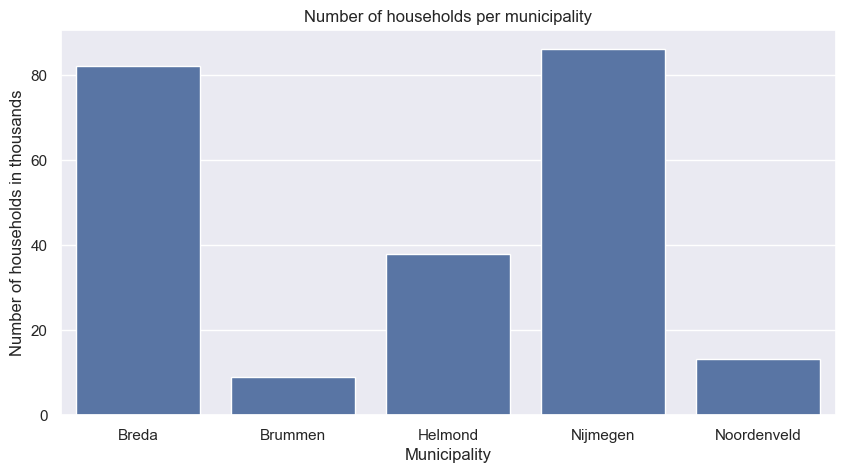

In [103]:
#// BEGIN_TODO [GA1_1a1] (1 point)

ax = sns.barplot(x=df_population[df_population['year'] == 2012]['municipality'], y=df_population[df_population['year'] == 2012]['num_households'])
ax.set_xlabel('Municipality')
ax.set_ylabel('Number of households in thousands')
ax.set_title('Number of households per municipality');


In [104]:
#// END_TODO [GA1_1a1]


2. Did the number of households in these municipalities remain stable through the years? Was it growing or decreasing? In case some municipalities are significantly smaller than others, comparing the changes in the numbers of the households will not be an appropriate option to answer the question. Therefore you will look at the relative changes.
   - Add a column called 'diff_num_households(%)' to df_population.
   - For each ('municipality', 'year')-pair, compute the relative difference in the number of households compared to 2012, expressed as a percentage (positive in the case of growth) and store it in the added column. Since 2012 is taken as a baseline, all rows of the year 2012 will get a 0.
   - Generate a line plot with 5 lines representing these relative changes. The value of 'diff_num_households(%)' should be on the y-axis, and the year on the x-axis.

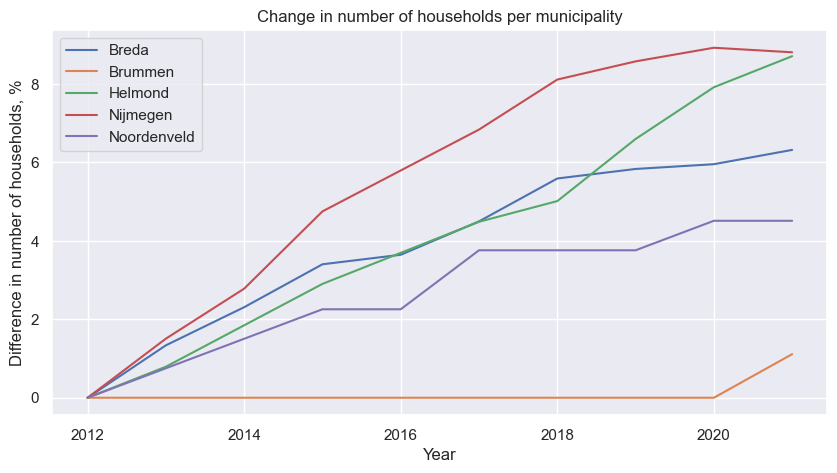

In [105]:
#// BEGIN_TODO [GA1_1a2] (3 points)

population_baselines = df_population[df_population['year'] == 2012]
population_baselines.set_index('municipality', inplace=True)

df_population['diff_num_households(%)'] = df_population.apply(
    lambda row: (row['num_households'] / population_baselines.loc[row['municipality']]['num_households'] -1) * 100, axis=1)

_, fig = plt.subplots()

for element in municipalities:
    sns.lineplot(x=df_population[df_population['municipality'] == element]['year'],
                 y=df_population[df_population['municipality'] == element]['diff_num_households(%)'],
                 label=element)

fig.set_xlabel('Year')
fig.set_ylabel('Difference in number of households, %')
fig.set_title('Change in number of households per municipality');

In [106]:
#// END_TODO [GA1_1a2]


3. Are there significant differences in the median income of the households? These differences might be relevant in the context of energy consumption for various reasons, such as the correlation between income and house insulation quality, house size, and living style. Unlike the previous question, we focus on absolute numbers here since we want to compare median incomes themselves, not just their changes, and we expect the median incomes of municipalities to be close to each other.
   - Generate a line plot containing five lines, one for each municipality, showing the median income over the analyzed period. Use `df_population`.
The median income should be on the y-axis, and the year on the x-axis.  Take into account the unit of the `'median_income'` column in the label of your y-axis.

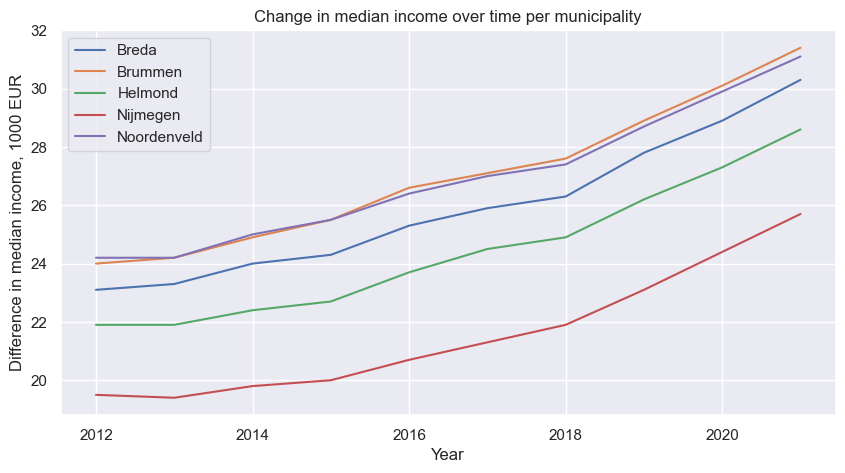

In [107]:
#// BEGIN_TODO [GA1_1a3] (2 points)

_, fig = plt.subplots()

for element in municipalities:
    sns.lineplot(x=df_population[df_population['municipality'] == element]['year'],
                 y=df_population[df_population['municipality'] == element]['median_income'],
                 label=element)

fig.set_xlabel('Year')
fig.set_ylabel('Difference in median income, 1000 EUR')
fig.set_title('Change in median income over time per municipality');

In [108]:
#// END_TODO [GA1_1a3]


4. Are there differences in the education level of people living in the municipalities? These differences might be relevant since they might be linked to differences in awareness of environmental issues and benefits of energy-efficient appliances, but they might also be linked to a correlation between education level and income, and using energy-consuming features like swimming pools.
Therefore it might be relevant to know that the population of municipality A has only 5% of people with higher education level, while municipality B has 25%.
    - Create a DataFrame called `df_edu_normalized` with the same shape as `df_edu`.
    - For each municipality, compute the relative share of each education level (so the values should range from 0 to 1) and store it in `df_edu_normalized`.
    - Generate a normalized heat map of the relative number of people with a certain education level per municipality, using `df_edu_normalized`. The education level should be on the horizontal axis and your municipalities on the vertical one.

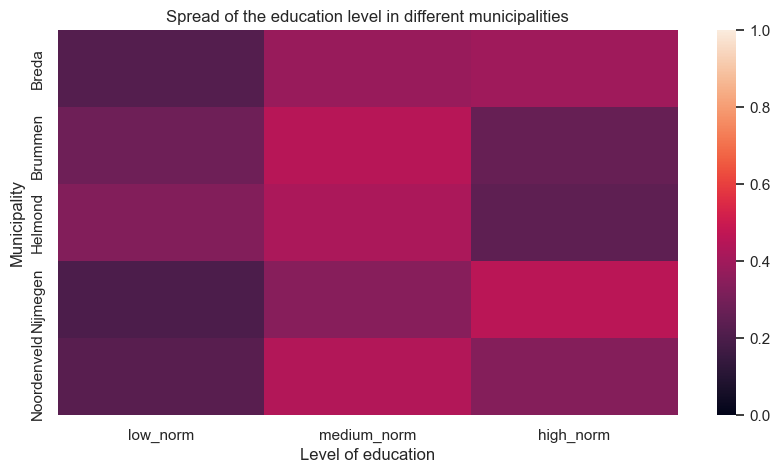

In [109]:
#// BEGIN_TODO [GA1_1a4] (2 points)

df_edu['low_norm'] = df_edu['low'] / (df_edu['low'] + df_edu['medium'] + df_edu['high'])
df_edu['medium_norm'] = df_edu['medium'] / (df_edu['low'] + df_edu['medium'] + df_edu['high'])
df_edu['high_norm'] = df_edu['high'] / (df_edu['low'] + df_edu['medium'] + df_edu['high'])

ax = sns.heatmap(df_edu[['low_norm', 'medium_norm', 'high_norm']], vmin=0, vmax=1)
ax.set_xlabel('Level of education')
ax.set_ylabel('Municipality')
ax.set_title('Spread of the education level in different municipalities');


In [110]:
#// END_TODO [GA1_1a4]


5. What do you observe in the plots you generated in Task 1a(1-4)?
Are the municipalities very similar, or are there large differences?
Could the differences affect the average energy consumption in these municipalities? Why so?
Store your observations as a string in the variable `observations_municipalities`.

In [111]:
#// BEGIN_TODO [GA1_1a5] (1 point)

observations_municipalities = 'From the first two plots we can generally see the trend that municipalities with higher population have bigger increase of this population over time. There is a large difference in the population. But for the third plot, we can see that all municipalities have almost identical trend in the change of the median income. We can`t say for sure, but these difference may have an effect on energy consumption. For example, as seen from the 4-th plot, difference in education may have effect as educated people are more aware of global problems and may take more actions towards helping the world by lowering energy consumption. Or, as seen from the 3-rd graph, people with lower median income may not have enough money to live without limiting energy consumption so they will try to find ways how to lower it. Moreover, areas with higher increase of population may be the more developed areas and tht is why people are moving there, and if they are more developed, they may have more investments into the green energy, lowering the energy consumption from the grid. There might be many different factors and we cannot answer the question for sure without knowing more details.'


In [112]:
#// END_TODO [GA1_1a5]

### <a id='toc1_5_2_'></a>[Task 1b: Natural gas consumption](#toc0_)
The next task is to find differences between municipalities in the natural gas consumption and in the trends over time for each of the two house types (housing characteristics).
Create a visualization of the average annual natural gas consumption over time for your municipalities and housing characteristics.
Choose the most appropriate visualization from:

  A. Two separate bar plots, corresponding to your two housing characteristics, with each plot containing five bars per year corresponding to your five municipalities.
  The average annual natural gas consumption should be on the y-axis, and the year on the x-axis.
  
  B. Two separate line plots, corresponding to your two housing characteristics, with each plot containing five lines corresponding to your five municipalities.
  The average annual natural gas consumption should be on the y-axis, and the year on the x-axis.

  C. Five separate bar plots, corresponding to your five municipalities, with each plot containing two bars per year corresponding to your two housing characteristics.
  The average annual natural gas consumption should be on the y-axis, and the year on the x-axis.
  
  D. Five separate line plots, corresponding to your five municipalities, with each plot containing two lines corresponding to your two housing characteristics.
  The average annual natural gas consumption should be on the y-axis, and the year on the x-axis.

Assign the letter corresponding to the visualization of your choice to the variable `choice_1b` as a string (i.e. `'A'`, `'B'`, `'C'` or `'D'`), and create the visualization.

What do you observe in the visualization? Are there differences in gas consumption between municipalities? Are the differences similar for both house types? Is there any pattern in changes over time for all municipalities?
Are there differences in gas consumption between house types?
Store your observations as a string in the variable `observations_gas_consumption`.

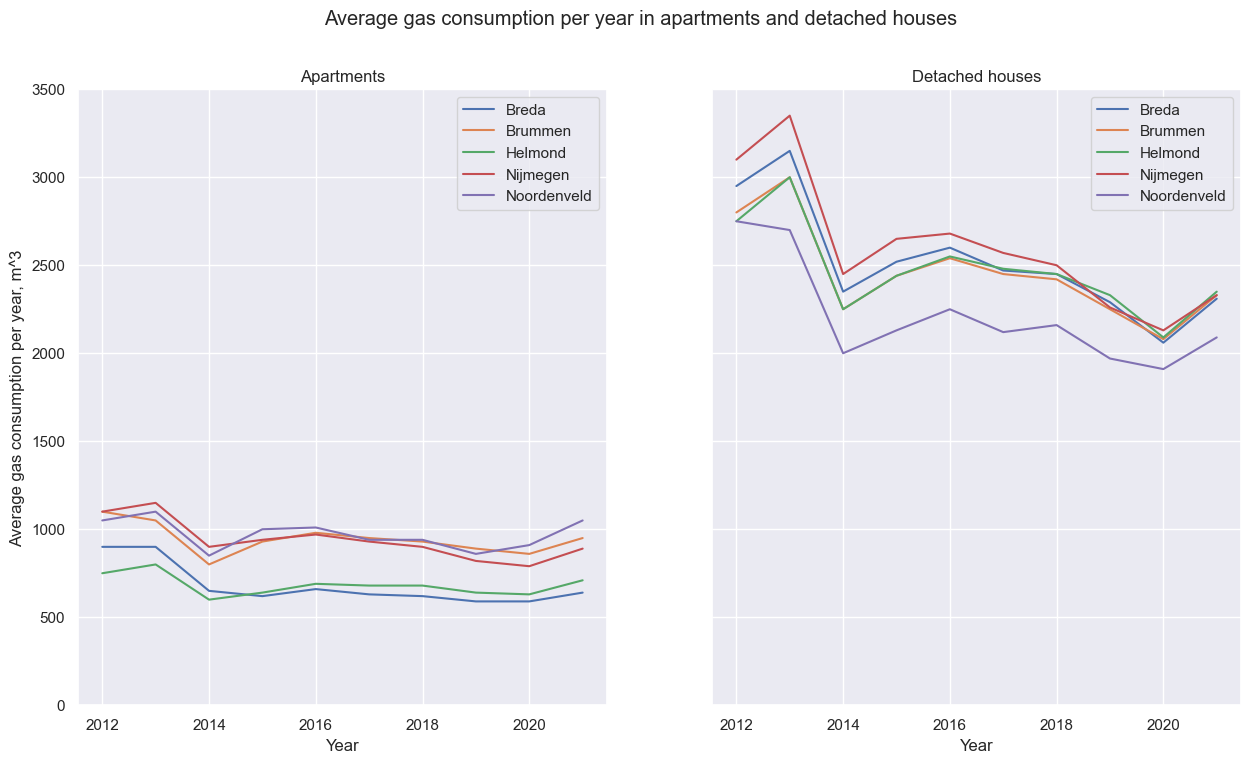

In [113]:
#// BEGIN_TODO [GA1_1b] (4 points)

choice_1b = 'B'

fig, ax = plt.subplots(nrows=1, ncols=2, squeeze=False, sharex=True, sharey=True, figsize=(15, 8))

for house_index, house in enumerate(house_types):
    for element in municipalities:
        sns.lineplot(x=df_energy[(df_energy['housing_characteristics'] == house) &
                                 (df_energy['municipality'] == element)]['year'],
                     y=df_energy[(df_energy['housing_characteristics'] == house) &
                                 (df_energy['municipality'] == element)]['avg_gas_consumption'],
                     ax=ax[0, house_index], label=element)
        ax[0, house_index].set_xlabel('Year')

ax[0, 0].set_title('Apartments')
ax[0, 1].set_title('Detached houses')
ax[0, 0].set_ylabel('Average gas consumption per year, m^3')
fig.suptitle('Average gas consumption per year in apartments and detached houses')
plt.ylim(0, 3500)
plt.legend();


In [114]:
observations_gas_consumption = 'Looking at the municipalities, we can see that all 5 municipalities have very similar trends in the gas consumption. However, there is a huge difference between detached houses and apartments. On average, gas consumption in detached houses is more than twice as high. But at the same time, Detached houses have clear trend of decreasing consumption up until 2020, while in apartments there is no huge change. For the apartments, municipalities of Helmond and Breda have the least gas consumption comparing to other ones. For the detached houses, Noordenveld is the municipality with the least consumption. So we can see that the statistics is very different for two types of housing.'

In [115]:
#// END_TODO [GA1_1b]


### <a id='toc1_5_3_'></a>[Task 1c: Trends in natural gas consumption](#toc0_)

Аnnual natural gas consumption by households depends on multiple factors. For example, a cold winter might result in an increase in annual gas consumption for each house type in each municipality. Conversly, if many semi-detached houses are built/renovated in one of the municipalities in the past year, the annual average might remain stable despite the cold winter due to improved average energy efficiency for semi-detached houses there. 

The `df_energy` dataframe contains a column called `baseline_gas_consumption`, containing the means of the average annual consumptions of 2010 and 2011 for houses with the housing characteristics and municipality indicated in that row. You are to explore how the gas consumption was changing compared to the baseline.

Add a new column called `rel_gas_consumption(%)` to this dataframe. Fill the new column with the relative annual gas consumption as the percentage compared to the baseline.

> **Example:** Suppose the average annual gas consumption of semi-detached houses in municipality A was 2000 m<sup>3</sup> in 2016 and the baseline for these houses in this municipality is 2500 m<sup>3</sup>. The `rel_gas_consumption(%) should get value 80.

Recreate your plot(s) from Task 1b for the relative gas consumption instead of the absolute gas consumption. 
Does this provide new insights? Does it confirm the previous ones?
Store your observations as a string in the variable `observations_rel_gas_consumption`.

In [116]:
#// BEGIN_TODO [GA1_1c] (4 points)

df_energy['rel_gas_consumption(%)'] = df_energy['avg_gas_consumption'] / df_energy['baseline_gas_consumption'] * 100


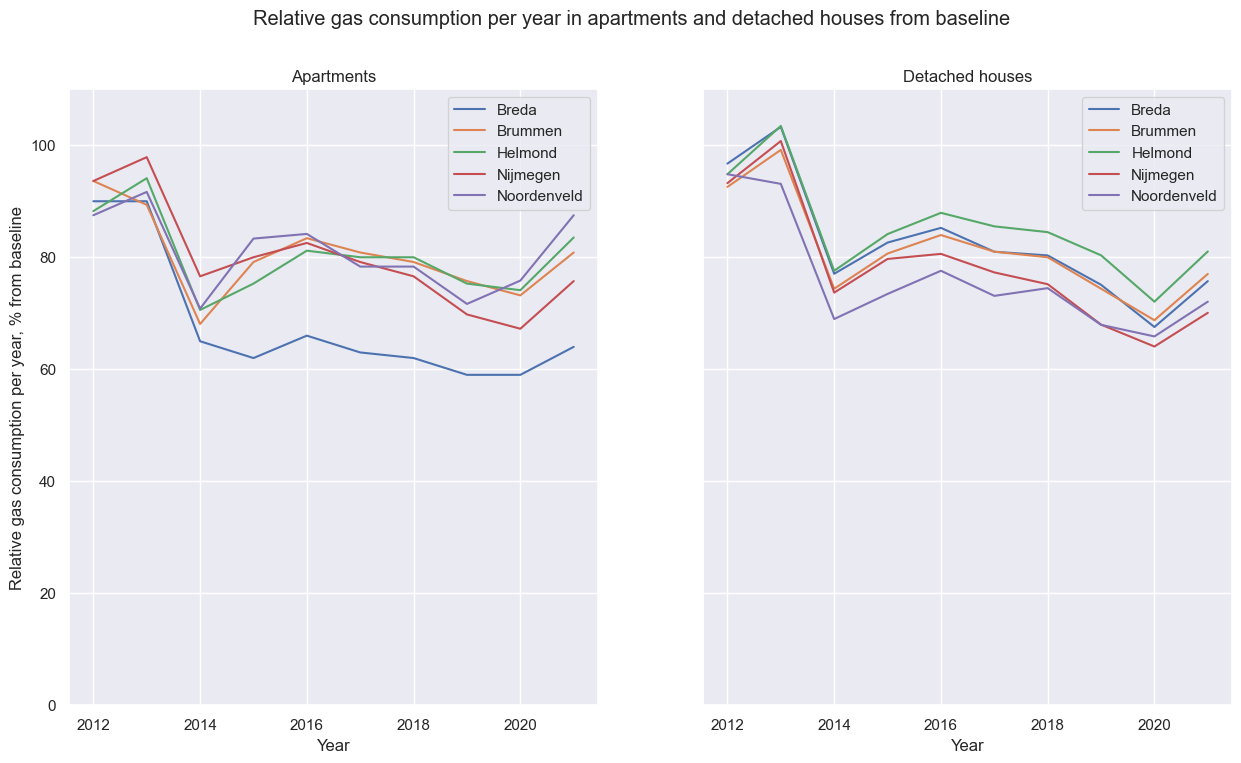

In [117]:
fig, ax = plt.subplots(nrows=1, ncols=2, squeeze=False, sharex=True, sharey=True, figsize=(15, 8))

for house_index, house in enumerate(house_types):
    for element in municipalities:
        sns.lineplot(x=df_energy[(df_energy['housing_characteristics'] == house) &
                                 (df_energy['municipality'] == element)]['year'],
                     y=df_energy[(df_energy['housing_characteristics'] == house) &
                                 (df_energy['municipality'] == element)]['rel_gas_consumption(%)'],
                     ax=ax[0, house_index], label=element)
        ax[0, house_index].set_xlabel('Year')

ax[0, 0].set_title('Apartments')
ax[0, 1].set_title('Detached houses')
ax[0, 0].set_ylabel('Relative gas consumption per year, % from baseline')
fig.suptitle('Relative gas consumption per year in apartments and detached houses from baseline')
plt.ylim(0, 110)
plt.legend();

In [118]:
observations_rel_gas_consumption = 'Relative consumption allows to see the difference between different housing types better as they have now similar scale of values. We can now see the two big falls on both of the graphs - one in the 2014 and one in the 2020. This shows that economical crisis may affect gas consumption. After 2014 all municipalities have an increase in gas consumption apart from municipality of Breda where there is no increase for the apartments. Also we can see that Detached houses in the 2013 is the only time when gas consumption was more than the baseline.'

In [119]:
#// END_TODO [GA1_1c]

### <a id='toc1_5_4_'></a>[Task 1d: Temperature distribution](#toc0_)
The Netherlands is a relatively small country, but there are still differences in air temperatures between different regions. These differences might have impact on the annual gas consumption. Compare the distributions of daily temperature averages in the analyzed period for the five municipalities.
Choose the most appropriate visualization from:

  A. Normalized histograms for each (municipality, year)-pair, representing the distribution of the daily temperature averages of the muncipality and year in question.
  The daily average temperature should be on the x-axis, and the (normalized) frequency on the y-axis.

  B. Violin plots, one per municipality, each containing ten violins depicting corresponding distributions of the daily temperature averages for each of the ten years in the dataset.
  The daily average temperature should be on the y-axis, and the year on the x-axis.

  C. Five separate strip plots (with `jitter=True`), corresponding to your five municipalities, with each plot containing all daily temperature averages of that municipality against the year.
  In other words, the dots in each strip plot are all (year, daily average temperature)-pairs of the municipality.
  The daily average temperature should be on the y-axis, and year on the x-axis.

  D. One scatterplot of daily average temperature against year using all the data, in which the municipalities are distinguished using a color scheme (with a legend).
  The daily average temperature should be on the y-axis, and year on the x-axis.

Assign the letter corresponding to the visualization of your choice to the variable `choice_1d` as a string (so `'A'`, `'B'`, `'C'` or `'D'`), and create the visualization.
Only one of the choices will award full points for this task.

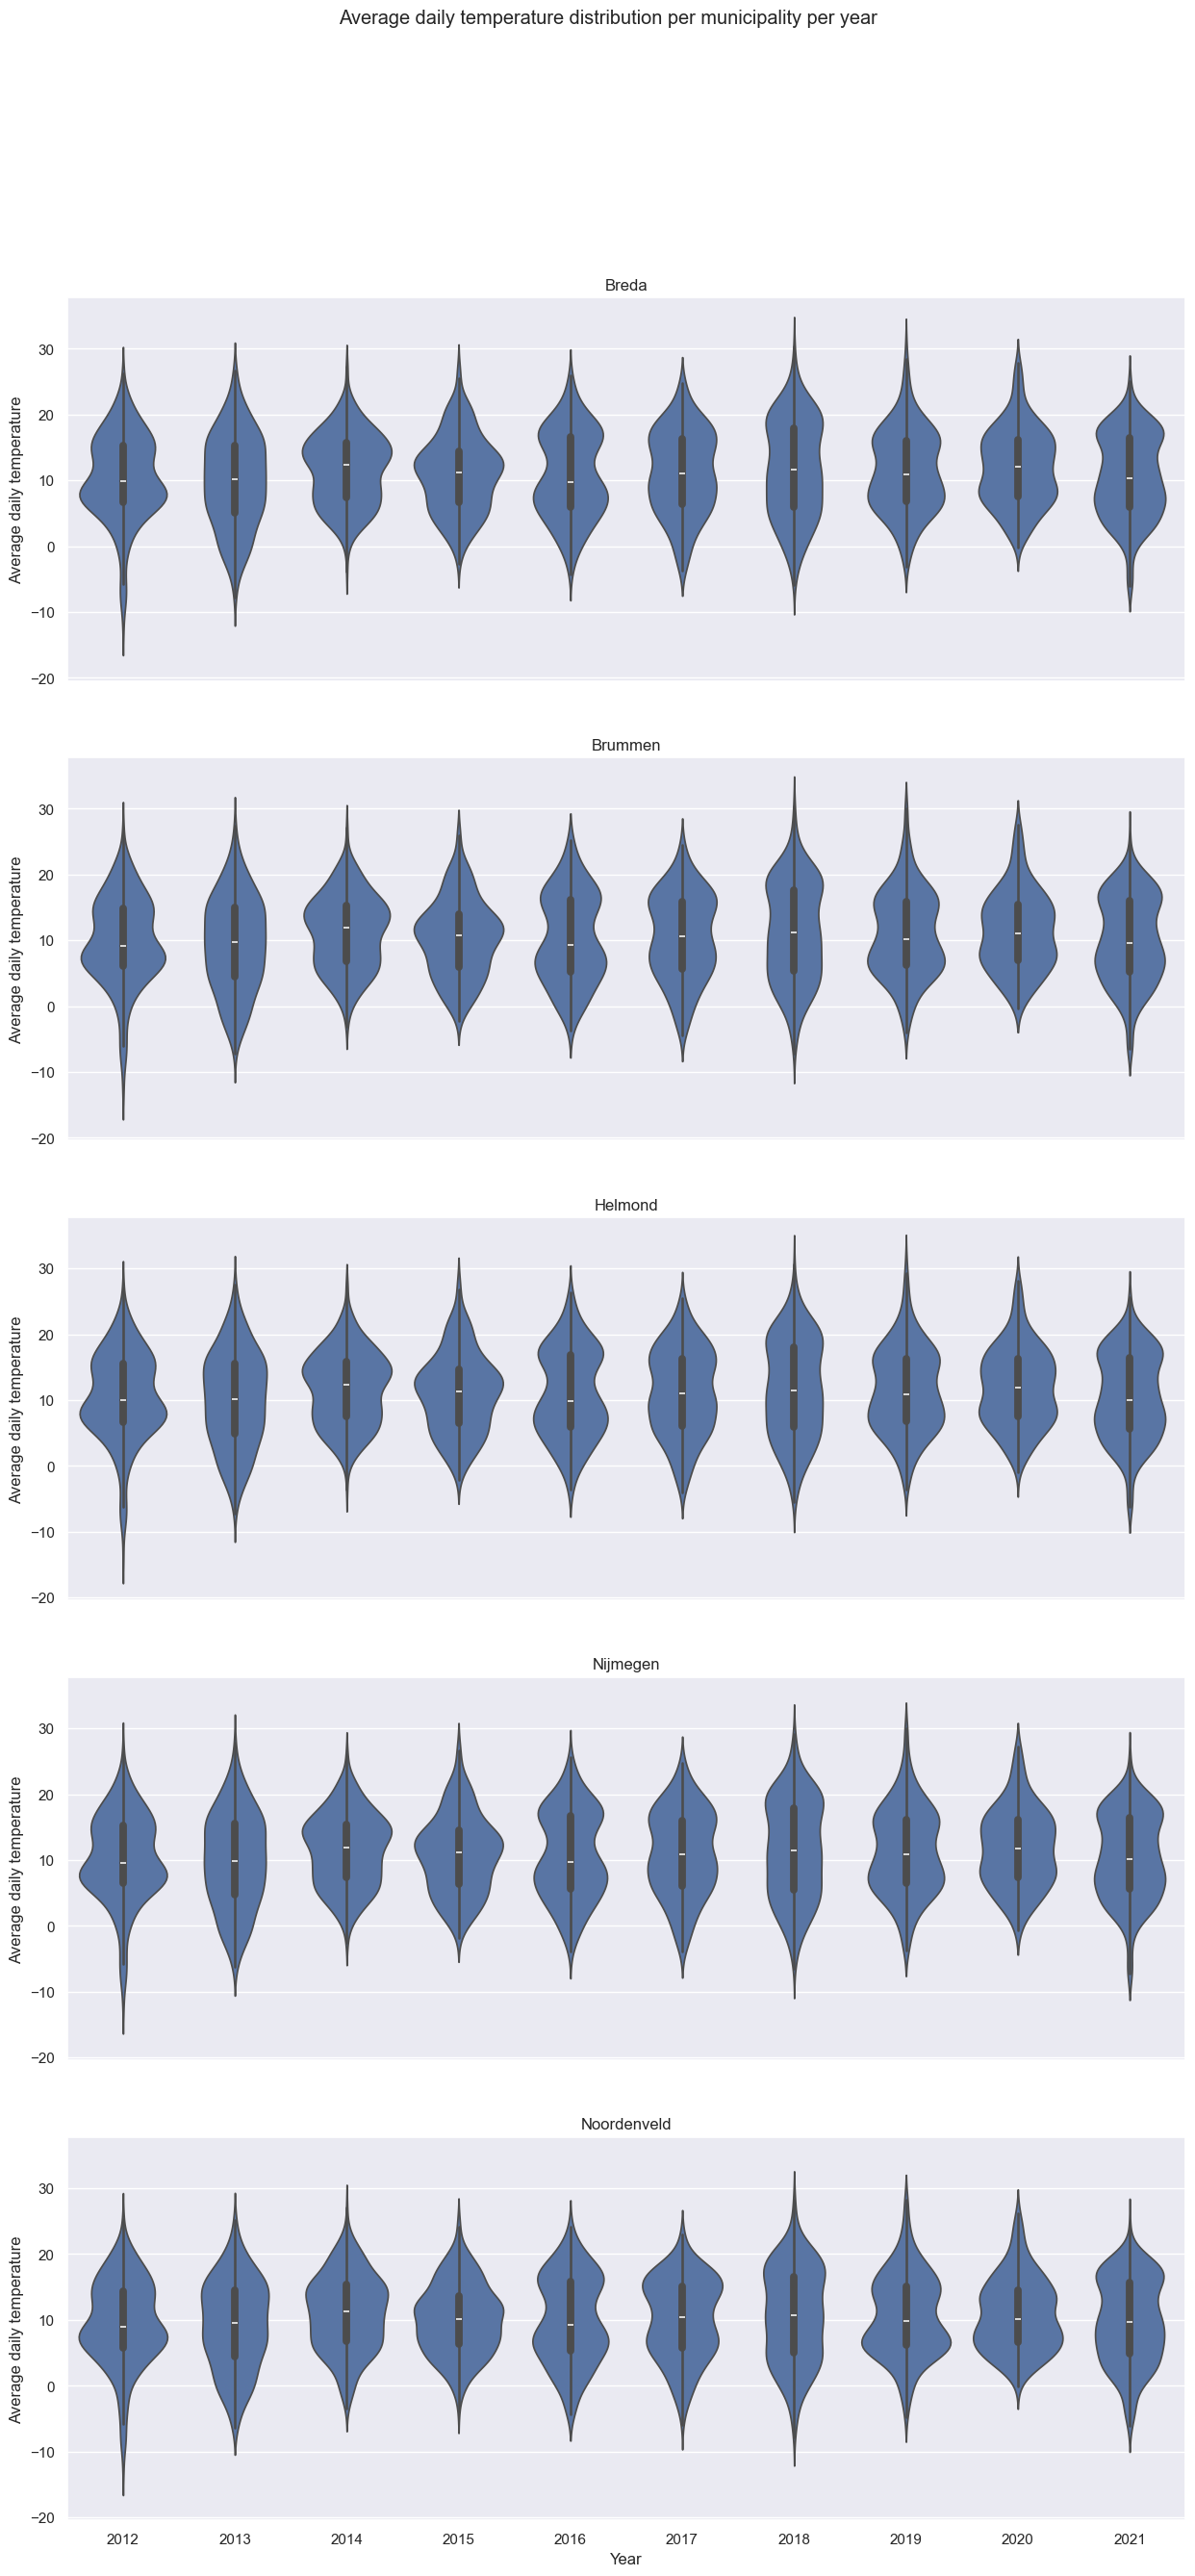

In [120]:
#// BEGIN_TODO [GA1_1d] (6 points)

choice_1d = 'B'
fig, ax = plt.subplots(nrows=5, ncols=1, squeeze=False, sharex=True, sharey=True, figsize=(15, 30))

for index, element in enumerate(municipalities):
    sns.violinplot(
        x=df_weather[df_weather['municipality'] == element]['year'],
        y=df_weather[df_weather['municipality'] == element]['temperature'],
        ax=ax[index, 0])
    ax[index, 0].set_title(element)
    ax[index, 0].set_ylabel('Average daily temperature')

ax[4, 0].set_xlabel('Year')
fig.suptitle('Average daily temperature distribution per municipality per year');


In [121]:
#// END_TODO [GA1_1d]

### <a id='toc1_5_5_'></a>[Degree days](#toc0_)

Outside air temperature significantly affects household natural gas usage, particularly for heating, which consumes more gas than cooking or heating water for showers. During summer, heating systems are mostly idle, while in winter they work hard to keep houses warm. Wind can further increase gas consumption by making it harder to maintain indoor warmth.

However, the current temperature and wind speed are not reliable predictors of whether the heating is on or how hard it is working right now. For example, a summer night might see temperatures drop to 10°C, but the heating system remains off because the house retains warmth from the day. Conversely, the heating system might be active on a winter afternoon with the same 10°C outside temperature even if it is not windy.
Therefore, average daily temperatures adjusted for average daily wind speed are often used as predictors for daily gas consumption. 

**Effective temperature**

The **average *effective* temperature of the day** is typically used as predictor for daily gas consumption (see the [KNMI webpage](https://www.knmi.nl/over-het-knmi/nieuws/graaddagen-in-gasjaar-2021) for a more detailed explanation). It is obtained by decreasing the daily average temperature with a value proportional to the daily average wind speed as follows:
$$
    T_\mathrm{eff} = T_\mathrm{avg} - \frac{2}{3} v_\mathrm{avg},
$$
where $T_\mathrm{avg}$ is the daily average temperature ($^\circ\mathrm{C}$) and $v_\mathrm{avg}$ is the average wind speed (m/s) for that day. 

A common assumption in the Netherlands is that heating is switched on when the average effective temperature of the day is below 14°C and off otherwise. To capture this assumption, we define a threshold value as $T_\mathrm{threshold} = 14 ^\circ\mathrm{C}$.
Under this assumption, that is no difference in gas consumption for heating between days with the effective temperature of 16°C and those with 18°C. 
A positive difference between the threshold and the effective temperature correlates with gas consumption, while a negative difference should be ignored. This leads to an improved predictor for gas consumption, defined as $\max\{0, T_\mathrm{threshold} - T_\mathrm{eff}\}$.

**Degree days**

KNMI uses an aggregated measure based on the average effective temperatures to estimate the impact of temperature on annual gas consumption. This measure is called **degree days** ("graaddagen" in Dutch). The number of degree days $D(y)$ in year $y$ is the sum of the improved predictors for all days of the year[<sup>1</sup>](#fn1):
$$
    D(y) = \sum_{n=1}^{365} \max\{0, T_\mathrm{threshold} - T_\mathrm{eff}(n)\},
$$
where $T_\mathrm{eff}(n)$ denotes the average effective temperature of the $n$-th day of the year.


> **Note**: Degree days $D(y)$ do not refer to a number of days but to the measure for the temperature effect in that year. Therefore, it is (usually) not an integer, despite what the name may suggest. For a day with $T_\mathrm{eff}= 4.6$, $\max\{0, 14 - T_\mathrm{eff}\}=9.4$, and for  $T_\mathrm{eff}= 20.5$, $\max\{0, 14 - T_\mathrm{eff}\}=0$.
> Furthermore, **the summation must be adjusted for *leap years***, which contain 366 days.

In [122]:
T_threshold = 14         # setting the threshold for the average effective temperature of a day

### <a id='toc1_5_6_'></a>[Task 2a: Computing the degree days](#toc0_)

First, add a new column called `effective_temp` to `df_weather`, computing its values with the formula for $T_\mathrm{eff}$ shown above.
Then add a column `degree_day`, computing the values as $\max\{0, T_\mathrm{threshold} - T_\mathrm{eff}\}$. 

**Hint**: Use the [.clip method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.clip.html#pand) to set a lower bound of 0 for the degree day values. For example, 
`df_scores['score'] = df_scores['score'].clip(lower=0)` modifies negative scores to 0, while leaving other values unchanged.

Finally, create a dataframe `df_degree_days` with columns `municipality`, `year` and `degree_days` (similar in structure to `df_population`), in which you store the annual degree days $D(y)$ computed as defined above for each (municipality, year)-pair.

**Hint**: Because `municipality` and `year` need to be columns, they cannot appear in a MultiIndex. But you could first create a version of `df_degree_days` with only the `degree_days` column indexed by both `municipality` and `year` (in a MultiIndex) and then use the [.reset_index method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html) to turn `municipality` and `year` into columns.

In [123]:
#// BEGIN_TODO [GA1_2a] (6 points)

df_weather['effective_temp'] = df_weather['temperature'] - (2 * df_weather['wind_speed'] / 3)
df_weather['degree_day'] = df_weather.apply(lambda row: max(0, T_threshold - row['effective_temp']), axis=1)

grouped = df_weather.groupby(['municipality', 'year'])
df_degree_days = grouped['degree_day'].sum().reset_index()
df_degree_days['degree_days'] = df_degree_days['degree_day']
df_degree_days.drop('degree_day', axis=1, inplace=True)

In [124]:
#// END_TODO [GA1_2a]

### <a id='toc1_5_7_'></a>[Task 2b: Compare degree days to energy consumption](#toc0_)

Investigate the relationship between degree days and annual natural gas consumption.
To do this, create two scatter plots of the relative natural gas consumption (on the x-axis) against the degree days (on the y-axis), one for each house type. 
Use the combined data from different municipalities and all years to explore the relationship. 

In [125]:
df_energy = df_energy.merge(df_degree_days, on=['municipality', 'year']) 
# The merge function in pandas is used to combine two DataFrames based on common columns.

df_energy.head()

,housing_characteristics,municipality,year,avg_gas_consumption,avg_electricity_consumption,baseline_gas_consumption,baseline_electricity_consumption,rel_gas_consumption(%),degree_days
0,Apartment,Breda,2012,900,2300,1000,2325,90.0,2400.376389
1,Apartment,Breda,2013,900,2300,1000,2325,90.0,2638.900000
2,Apartment,Breda,2014,650,2200,1000,2325,65.0,1918.063889
3,Apartment,Breda,2015,620,2180,1000,2325,62.0,2233.434722
4,Apartment,Breda,2016,660,2150,1000,2325,66.0,2286.890278


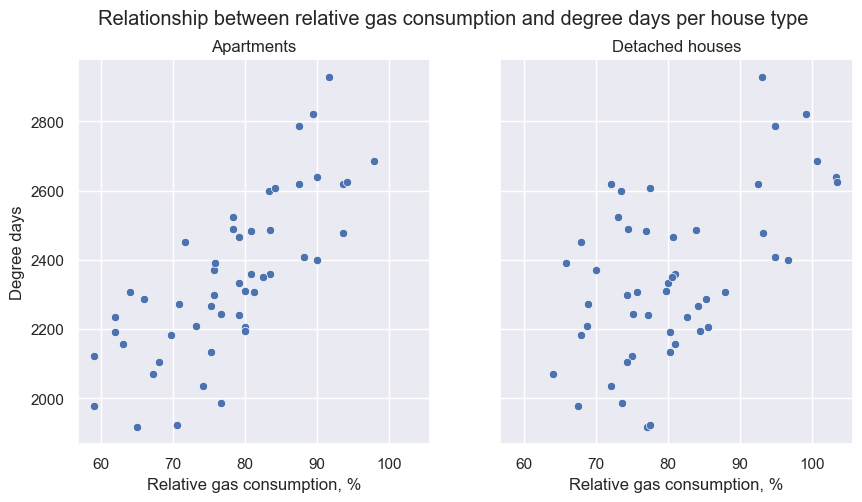

In [126]:
#// BEGIN_TODO [GA1_2b] (4 points)

fig, ax = plt.subplots(nrows=1, ncols=2, squeeze=False, sharex=True, sharey=True)

sns.scatterplot(x=df_energy[df_energy['housing_characteristics'] == 'Apartment']['rel_gas_consumption(%)'],
                y=df_energy[df_energy['housing_characteristics'] == 'Apartment']['degree_days'],
                ax=ax[0, 0])

sns.scatterplot(x=df_energy[df_energy['housing_characteristics'] == 'Detached house']['rel_gas_consumption(%)'],
                y=df_energy[df_energy['housing_characteristics'] == 'Detached house']['degree_days'],
                ax=ax[0, 1])

ax[0, 0].set_title('Apartments')
ax[0, 0].set_xlabel('Relative gas consumption, %')
ax[0, 0].set_ylabel('Degree days')
ax[0, 1].set_title('Detached houses')
ax[0, 1].set_xlabel('Relative gas consumption, %')

fig.suptitle('Relationship between relative gas consumption and degree days per house type');


In [127]:
#// END_TODO [GA1_2b]

## <a id='toc1_6_'></a>[Part 2](#toc0_)

In the second part of this assignment you are to mine a prediction model for natural gas consumption for one of the two house types.
The code below creates a new table that shows energy usage, municipality size and median income for each municipality and year, combining corresponding rows from df_energy and df_population. 
Please, read the comments to the code in the cell below.

In [128]:
"""
The merge function combines two tables into one, based on common columns, which are ‘municipality’ and ‘year’ in this case. 
The function looks for rows in both tables where these columns have the same values and combines them into a single row in the new table, df_all.
"""
df_all = df_energy.merge(df_population, on=['municipality', 'year'])

In [129]:
"""
As you learned in the EDA Programming exercises, the head() methods returns the column names and the first 5 rows of the df_all dataframe, 
if the number of rows is not specified. 
Check what the combined data looks like. You will work with the df_all dataframe in Part 2.
"""
df_all.head()

,housing_characteristics,municipality,year,avg_gas_consumption,avg_electricity_consumption,baseline_gas_consumption,baseline_electricity_consumption,rel_gas_consumption(%),degree_days,num_households,median_income,diff_num_households(%)
0,Apartment,Breda,2012,900,2300,1000,2325,90.0,2400.376389,82.3,23.1,0.000000
1,Apartment,Breda,2013,900,2300,1000,2325,90.0,2638.900000,83.4,23.3,1.336574
2,Apartment,Breda,2014,650,2200,1000,2325,65.0,1918.063889,84.2,24.0,2.308627
3,Apartment,Breda,2015,620,2180,1000,2325,62.0,2233.434722,85.1,24.3,3.402187
4,Apartment,Breda,2016,660,2150,1000,2325,66.0,2286.890278,85.3,25.3,3.645200


<div class="alert-danger alert" role="alert">
    <b>Note:</b> The municipality size and median income are given for a municipality as a whole, not for specific house type. The median income of people living in certain type of houses could significantly deviate from the median income of their municipality. Keep this in mind when mining your prediction model.
</div>

#### <a id='toc1_6_1_1_'></a>[Task 3a: Choose variables for the prediction model](#toc0_)
Look through the results of the exploratory data analysis performed in Part 1 and think what variables might be good predictors for natural gas consumption. Choose **at least two** numeric variables recorded in `df_all` which you will use to (effectively) predict natural gas consumption. These will be the *independent variables* of your model. For evident reasons, you may not choose columns `avg_gas_consumption` and `rel_gas_consumption(%)`.

Choose one (of the two) housing characteristics for which you will mine a prediction model. This choice may be based on your findings in Part 1, but it may also be curiosity driven. 

Choose whether you will predict **relative gas consumption** or **absolute gas consumption**.
The natural gas consumption of the chosen house type will be the *dependent variable* in your model. 

1. Assign the housing type (housing characteristics) of your choice to the variable `chosen_housing_char`.
   
1. Assign the name of your dependent variable (`avg_gas_consumption` or `rel_gas_consumption(%)`) to the variable `dependent_var`.

1. Store the names of the independent variables of your choice in a **list variable** named `independent_vars`.
Each name should be one of the column names of `df_all`, typed in exactly the same way.

> **Note:** You are also allowed to use the `year` column if you think that there are temporal trends in the data.

In [218]:
#// BEGIN_TODO [GA1_3a] (1 point)

chosen_housing_char = 'Detached house'
dependent_var = 'rel_gas_consumption(%)'
independent_vars = ['degree_days', 'year', 'diff_num_households(%)', 'avg_electricity_consumption']


In [ ]:
#// END_TODO [GA1_3a]

#### <a id='toc1_6_1_2_'></a>[Task 3b: Split data into training and test data](#toc0_)
Before creating a prediction model, **split the data into training and test data**.
For this, use the `df_all` data frame.

1. First, split the entire data frame into two data frames: assign the **training data** to the `df_train` data frame and the **test data** to the `df_test` data frame (do not drop any columns).

1. From these two data frames, extract the training and the test data of your independent and dependent variables, selecting only the relevant columns.
The **data frames** for your **independent variables** must be stored in the variables `X_train` and `X_test`, while the **series** for your **dependent variable** must be stored in the variables `y_train` and `y_test`.[<sup>2</sup>](#fn2)

In both steps, it is good practice to **make copies** of the data frame excerpts you create. This prevents unintended modifications of the original data frame.

> **Hints:**
> * Remember to restrict to the house type you selected in `chosen_housing_char`.
> * You can either split into training and test data randomly, or use a cutoff year.

In [219]:
#// BEGIN_TODO [GA1_3b] (4 points)

df_train, df_test = train_test_split(df_all.copy(), test_size=0.2, random_state=2076209)
X_train = df_train[df_train['housing_characteristics'] == chosen_housing_char][independent_vars].copy()
X_test = df_test[df_test['housing_characteristics'] == chosen_housing_char][independent_vars].copy()
y_train = df_train[df_train['housing_characteristics'] == chosen_housing_char][dependent_var].copy()
y_test = df_test[df_test['housing_characteristics'] == chosen_housing_char][dependent_var].copy()


In [ ]:
#// END_TODO [GA1_3b]

#### <a id='toc1_6_1_3_'></a>[Task 3c: Create your prediction model](#toc0_)
Now that the model variables have been chosen and the data has been divided, it is time to create the model itself.

1. Create a **linear regression model** that predicts the annual gas consumption of `chosen_housing_char` using `independent_vars`. Store the *linear regression* object in a variable called `model`.

1. Create (at least) two **residual plots** to visualize your model's performance on both the training and the test data. You may choose which  variable to use on the x-axis. Label your axes indicating the variable and the units of measurement for each axis. One of the two plots should use the training data and the other one should use the test data.

1. To evaluate the performance of your model quantitatively, compute the **mean absolute error** of its predictions on the **test data**, and store the result in the variable `evaluation`.

1. Experiment with your model to see whether the model performs better if you introduce a quadratic term. In the submitted notebook, only show the model that is the most appropriate for this prediction task.

1. What do you observe? Write a summary of your observations and store it as a string in the variable `observations_predictions`.

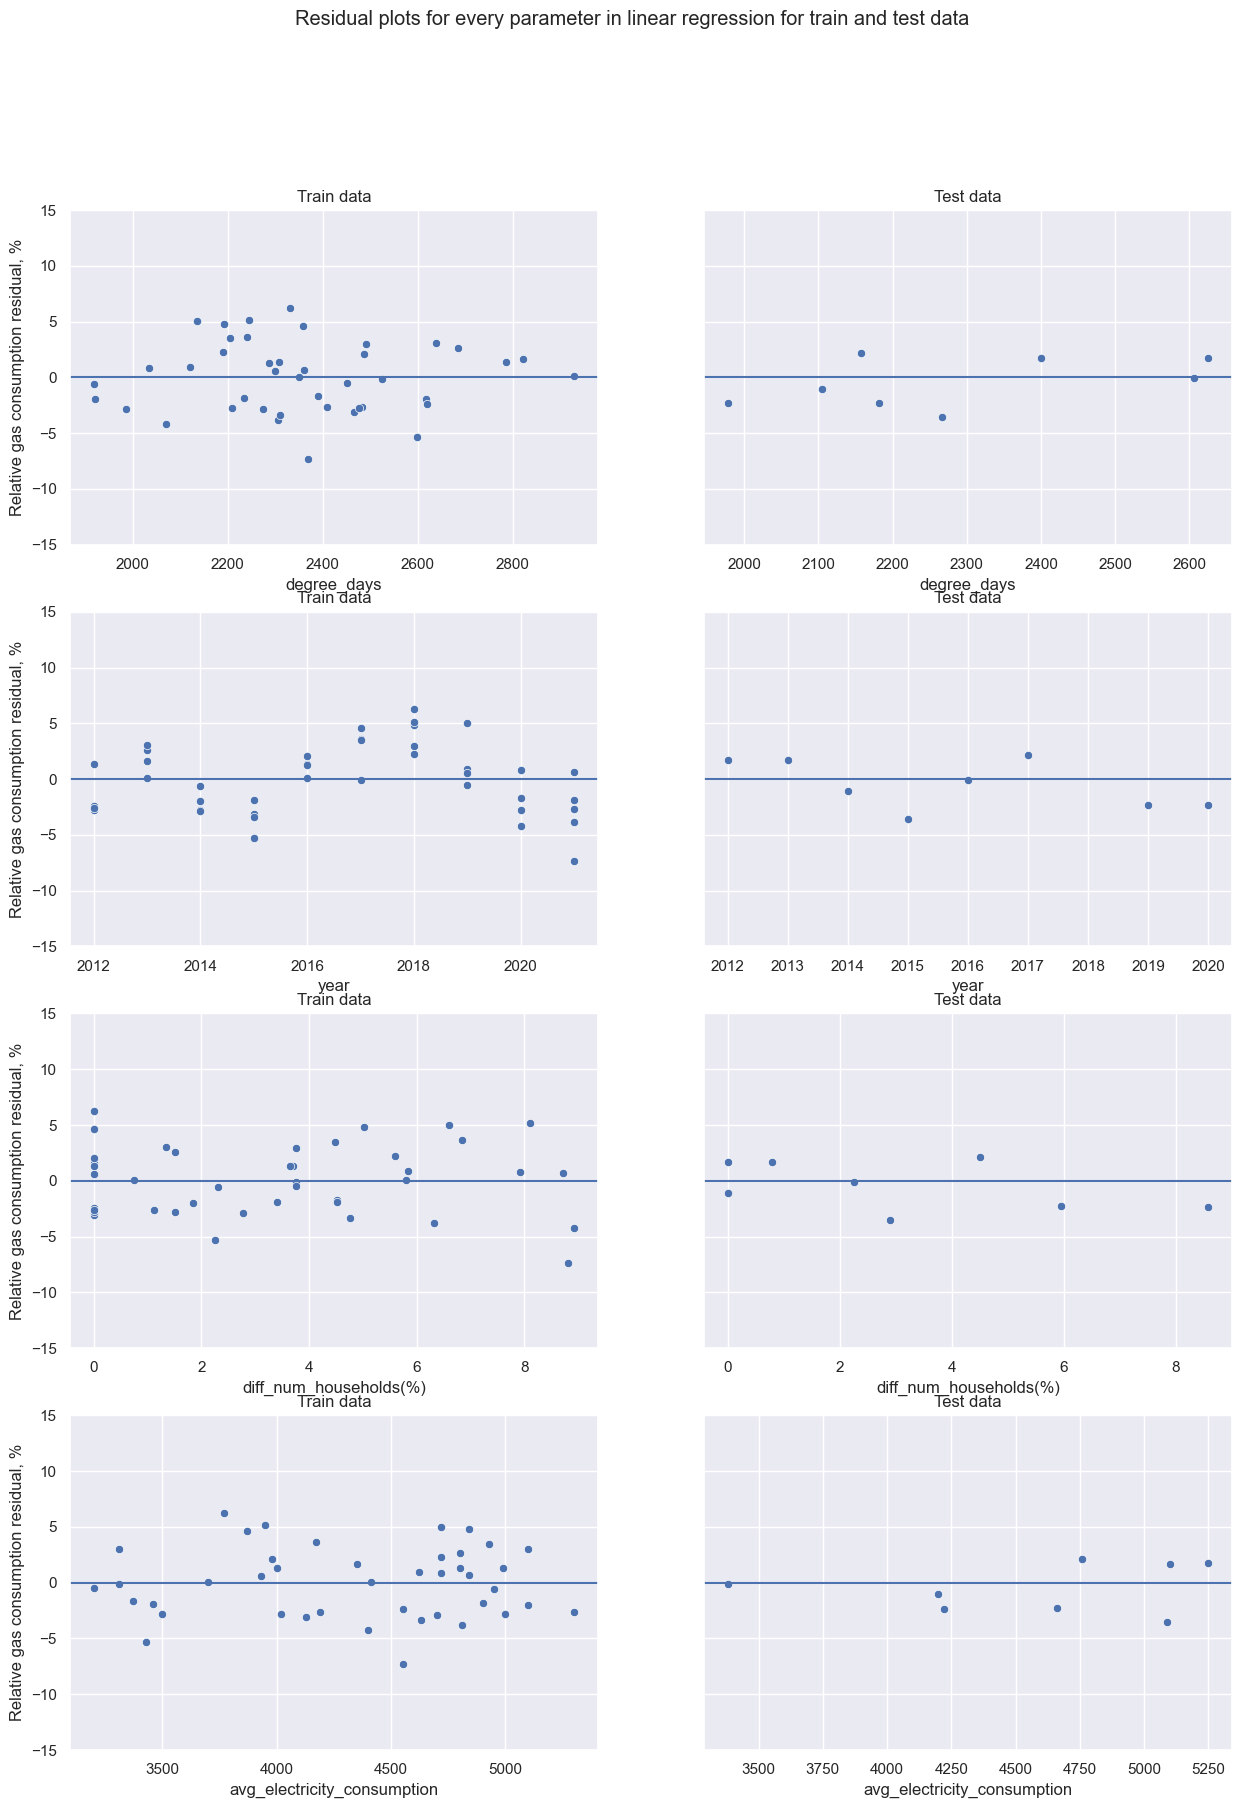

In [220]:
#// BEGIN_TODO [GA1_3c] (10 points)

model = LinearRegression()
model.fit(X_train.values, y_train)

y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

fig, ax = plt.subplots(nrows=len(independent_vars), ncols=2, sharey=True, figsize=(15, 5 * len(independent_vars)))

for index, independent_var in enumerate(independent_vars):
    sns.scatterplot(x=X_train[independent_var], y=y_train - y_train_pred, ax=ax[index, 0])
    ax[index, 0].set_ylim(-15, 15)
    ax[index, 0].set_ylabel('Relative gas consumption residual, %')
    ax[index, 0].axhline()
    ax[index, 0].set_title('Train data')
    sns.scatterplot(x=X_test[independent_var], y=y_test - y_test_pred, ax=ax[index, 1])
    ax[index, 1].set_ylim(-15, 15)
    ax[index, 1].axhline()
    ax[index, 1].set_title('Test data')

fig.suptitle('Residual plots for every parameter in linear regression for train and test data');


In [223]:
evaluation = mean_squared_error(y_test, model.predict(X_test.values))

observations_predictions = 'I experimented a lot with different combinations of parameters and what I saw is that there is no real combination that would give very good correlation, they all are rather OK and can show some relation but it cannot really be used for real-world predictions. In this particular combination of parameters, average electricity has the biggest correlation with the gas consumption. This is probably due to the fact that they both are usually used for similar goals in the households - either heating or cooking. '

np.float64(4.34548157908293)

In [ ]:
#// END_TODO [GA1_3c]

---

## <a id='toc1_7_'></a>[Part 3](#toc0_)

### <a id='toc1_7_1_'></a>[Task 4: Concluding Hypothesis](#toc0_)

What is the most important takeaway message concerning the relationship between natural gas consumption and the factors you explored? 
Based on your discoveries, come up with a hypothesis that indicates a possible direction for future research. 
Formulate your hypothesis in one sentence, and store it as a string in a variable named `hypothesis`.

Use this hypothesis as the basis for the conclusion of your poster. 
Make sure that you include supporting empirical evidence for your hypothesis in your poster. 
This evidence should come from the first two parts of this assignment, the exploratory part and/or the prediction part.

Note that the hypothesis may be negative, e.g., that there is no relationship between the gas consumption and the analyzed variable(s).

In [ ]:
#// BEGIN_TODO [Hypothesis] (1 point)

# ===== =====> Replace this line by your code. <===== ===== #


In [ ]:
#// END_TODO [Hypothesis]

### <a id='toc1_7_2_'></a>[Task 5: Create Your Poster](#toc0_)

Finally, create a poster on which you present and discuss your results. 
To this aim, you **must use the template of the poster available on Canvas**.
There, you can also find more information on how to create your poster.

Your poster should contain one visualisation generated for a question you formulate yourself. 
Use the cells below to create extra visualizations and possibly perform extra computations for your poster.
For example, you can:
- Investigate the house type that you did not choose in Part 2 and compare the results for the house types.
- Try a different value for $T_\mathrm{threshold}$ or vary the contribution of the wind speed in the definition of the degree days and see how it influences the mined model.
  
The best option: Come up with a **new analysis** that **you** find relevant and interesting!

<div class="alert alert-block alert-danger">
Also:
    <ol>
        <li>Include supporting empirical evidence for choosing your hypothesis in your poster.</li>
        <li><b>Ensure the visualizations that you include in your poster, are also produced by your notebook.</b>
        </li> Note that the visualizations displayed on Momotor might differ from the ones produced on your computer! This is due to the use of a testing database. After the deadline the full database will be used, so at that point the visualizations should be the same.
        <li>Double-check if the visualizations are produced correctly on Momotor under the <b>Running submitted notebook</b> tab.</li>
    </ol>
</div>

> **Note:** You are allowed to import additional libraries for this task, but make sure they do not cause errors in Momotor.

In [ ]:
#// BEGIN_TODO [Poster]

# ===== =====> Replace this line by your code. <===== ===== #


In [ ]:
#// END_TODO [Poster]

## <a id='toc1_8_'></a>[Footnotes](#toc0_)

$^1$ <span id="fn1"> Slightly different definitions are used throughout the literature. Sometimes the sum runs only over a subset of the year, some countries use different temperature thresholds, different notions of (effective) temperature exist, and sometimes the degree days are weighted based on their month to account for differences in solar radiation.

$^2$ <span id="fn2"> The capitalization of the `X` indicates that it refers to a matrix (2-dimensional), whereas the lowercase `y` indicates that it refers to a vector (1-dimensional). </span>

## <a id='toc1_9_'></a>[References](#toc0_)

[1] N. Wever, “Effectieve temperatuur en graaddagen,” KNMI, Feb. 2008.  
[2] R. J. M. Niessink, “Temperature correction – A Sensitivity Analysis,” ECN, Dec. 2017.

# Feedback

Please fill in this questionaire to help us improve this course for the next year. Your feedback will be anonymized and will not affect your grade in any way!

### How many hours did you spend on these Exercises?

Assign a number to `feedback_time`.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_1] (0 point)

feedback_time = 15

#// END_FEEDBACK [Feedback_1] (0 point)

import numbers
assert isinstance(feedback_time, numbers.Number), "Please assign a number to feedback_time"
feedback_time

### How difficult did you find these Exercises?

Assign an integer to `feedback_difficulty`, on a scale 0 - 10, with 0 being very easy, 5 being just right, and 10 being very difficult.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_2] (0 point)

feedback_difficulty = 7

#// END_FEEDBACK [Feedback_2] (0 point)

import numbers
assert isinstance(feedback_difficulty, numbers.Number), "Please assign a number to feedback_difficulty"
feedback_difficulty

### (Optional) What did you like?

Assign a string to `feedback_like`.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_3] (0 point)

#// END_FEEDBACK [Feedback_3] (0 point)

### (Optional) What can be improved?

Assign a string to `feedback_improve`. Please be specific, so that we can act on your feedback. For example, mention the specific exercises and what was unclear.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_4] (0 point)

#// END_FEEDBACK [Feedback_4] (0 point)




## How to Submit Your Work

1. **Before submitting**, you must run your notebook by doing **Kernel > Restart & Run All**.  
   Make sure that your notebook runs without errors **in linear order**.
1. Remember to rename the notebook, replacing `...-template.ipynb` with `...-yourIDnr.ipynb`, where `yourIDnr` is your TU/e identification number.
1. Submit the executed notebook with your work
   for the appropriate assignment in **Canvas**.
1. In the **Momotor** tab in Canvas,
  you can select that assignment again to find some feedback on your submitted work.
  If there are any problems reported by _Momotor_,
  then you need to fix those,
  and **resubmit the fixed notebook**.

In case of a high workload on our server
(because many students submit close to the deadline),
it may take longer to receive the feedback.


---

In [ ]:
# List all defined names
%whos

---

# (End of Notebook) <span class="tocSkip"></span>

&copy; 2024-2025 - **TU/e** - Eindhoven University of Technology